From the business understanding point, we want to ask the following questions:

1. Proportion of women in the Tech field?
2. Age distribution to start programming in women compared to men
3. Women programs as a hobby? And men?
4. Being a Women has an impact on salaries on tech-jobs?

First, I want to look at the data and explore what is the percentage of women over the total number of participants of the survey.

The principal libraries for wrangling our data are pandas, numpy, sklearn, matplotlib and seaborn.

# Gather Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


#Gather Data

df = pd.read_csv('./Project1/developer_survey_2020/survey_results_public.csv')
dfschema = pd.read_csv('./Project1/developer_survey_2020/survey_results_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


The Gender columns of the base specifies the gender of the individual. We can observe that multiple answers are allowed, so to limit the analysis, we will focus on the people who answer only the option "Woman"

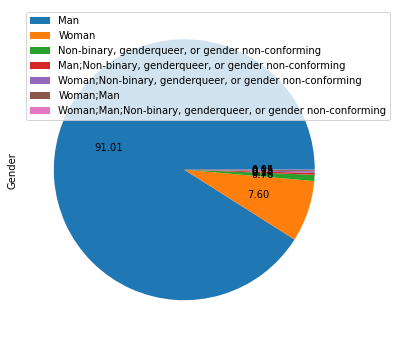

In [2]:
status_vals = df.Gender.value_counts()#Provide a pandas series of the counts for each Gender

# The below should be a pie of the proportion of individuals in each gender category 

fig, ax = plt.subplots()
(status_vals[:]).plot(kind="pie",labels=None,ax=ax, autopct='%.2f',figsize=(12,6));
ax.legend(labels=status_vals.index,loc='upper left')

Now we are interest in dividing the base in two categories. One for women and another for the rest of individuals. Now let´s plot a bar chart checking the proportion of people who program as Hobbie based on the hobbyist field.

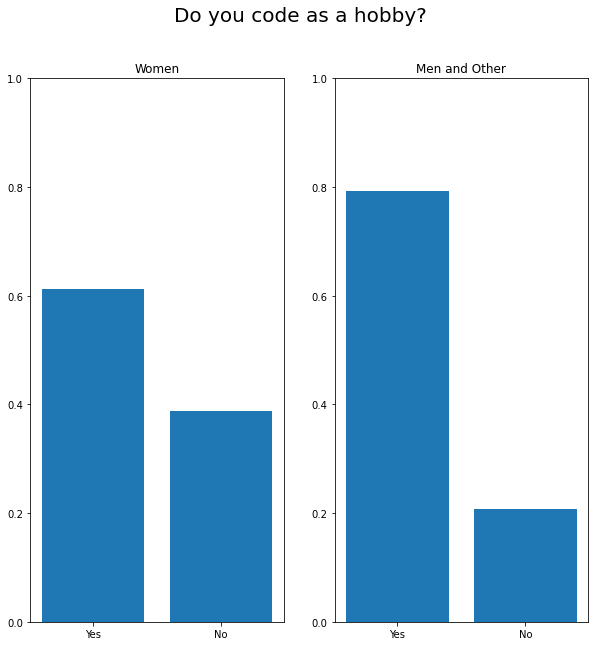

In [3]:
#Provide two variables with the women's individuals and other for do statistics.
dfwomem=df[df['Gender']=='Woman']
dfrest=df[df['Gender']!='Woman']

# The below should be a bar chart of the proportion of individuals whom programs as hobbyist in each gender category 
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
fig.suptitle('Do you code as a hobby?', fontsize=20)
ax1.bar(dfwomem.Hobbyist.value_counts().index, dfwomem.Hobbyist.value_counts().values/dfwomem.shape[0])
ax1.set_ylim([0,1]);
ax1.set_title('Women');
ax2.bar(dfrest.Hobbyist.value_counts().index, dfrest.Hobbyist.value_counts().values/dfrest.shape[0])
ax2.set_ylim([0,1]);
ax2.set_title('Men and Other');

Now we want to apply the same logic for determining the age when they start coding for each group. This can be obtain analyzing the Age1stCode variable.

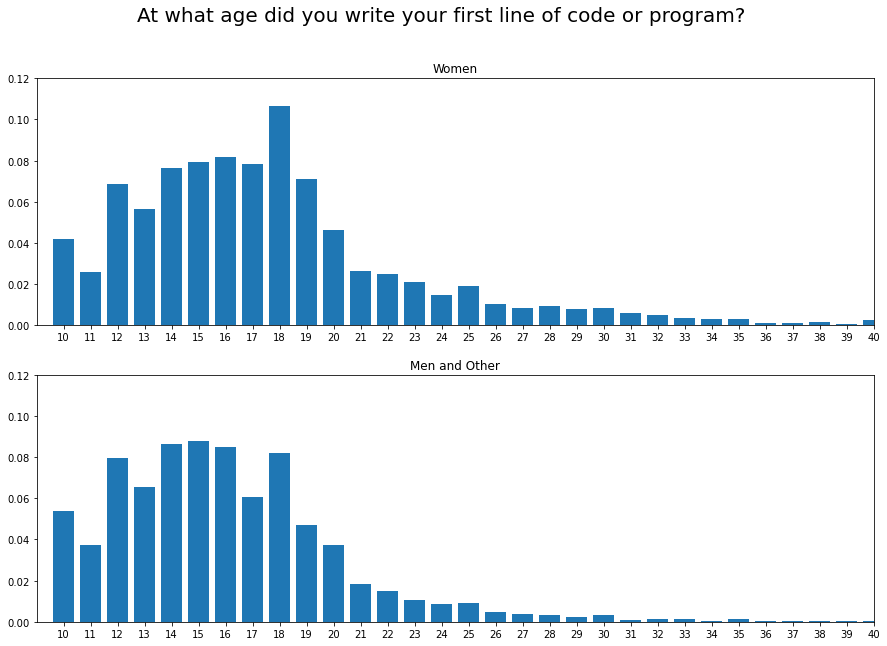

In [4]:
# Plot two bar charts for comparing the age for starting to code of both groups. We will focus on age from 10 to 40, giving that most of the data concentrated in that range.
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
fig.suptitle('At what age did you write your first line of code or program?', fontsize=20)
ax1.bar(dfwomem.Age1stCode.value_counts().sort_index().index, dfwomem.Age1stCode.value_counts().sort_index().values/dfwomem.shape[0])
ax1.set_ylim([0,0.12]);
ax1.set_xlim([-1,30]);
ax1.set_title('Women');
ax2.bar(dfrest.Age1stCode.value_counts().sort_index().index, dfrest.Age1stCode.value_counts().sort_index().values/dfrest.shape[0])
ax2.set_ylim([0,0.12]);
ax2.set_xlim([-1,30]);
ax2.set_title('Men and Other');

# Assessing

Now we want to explore the data for answering the question of the impact of gender in salary. First, we want to identify which columns has na's that exceed some treshold (in this case 40%).

In [5]:
# Pregunta 4

#Assess


num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset


no_nulls =set(df.iloc[:,(df.isna().sum()==0).values].columns) #Provide a set of columns with 0 missing values.

most_missing_cols = set(df.iloc[:,(df.isna().sum()>=round(df.shape[0]*0.40)).values].columns)#Provide a set of columns with more than 40% of the values missing


In [6]:
most_missing_cols
# This variable gives us the columns with na's exceeding 40% of total. In this case, we found that the 
# variables "CompTotal", "ConvertedComp" and "NEWPurchaseResearch" classify in this category. As the first and the second
# are the independent variables for the analysis, we cannot allow to exclude them. The third is not relevant for the analysis.

{'CompTotal', 'ConvertedComp', 'NEWPurchaseResearch'}

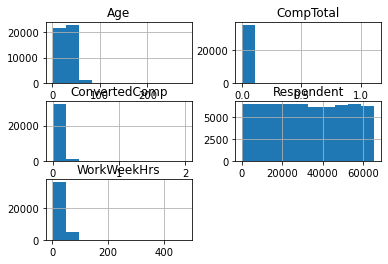

In [7]:
df.hist();
# we execute this command for identifying 
# which variables are numeric and it´s distribution. We are not interest in respondent field

# Cleaning and Analyzing

Now, we define a function that take our database and clean it based on the type of column (numeric, categorical) and drop the original columns and the one's we are not interested. For the numeric columns, we fill the nans with the mean value of the column.

We also drop other variables like 'CurrencySymbol', 'CurrencyDesc' and 'CompFreq' given that they are extremely correlated with the salary column (independent variable). If we don´t drop them, we could suffer multicollinearity.

Another important fact is that few columns has the option of choosing multiple answers, so we adjust the function with the purpose of separating categories (sep=;). This also reduces the size of the matrix as we observe in the next line in variable X.

In [8]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    df = df.dropna(subset=['ConvertedComp'], axis=0)
    y = df['ConvertedComp']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'CompTotal', 'ConvertedComp','CurrencySymbol','CurrencyDesc','CompFreq'], axis=1) 
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        dfdummies=df[var].str.get_dummies(sep=';').add_prefix(var+'_')
        df = pd.concat([df.drop(var, axis=1), dfdummies.drop(dfdummies.columns[0],axis=1)], axis=1)
    X = df    
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [9]:
X.head()

,Age,WorkWeekHrs,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",Hobbyist_Yes,Age1stCode_11,Age1stCode_12,Age1stCode_13,Age1stCode_14,Age1stCode_15,Age1stCode_16,...,YearsCodePro_48,YearsCodePro_49,YearsCodePro_5,YearsCodePro_50,YearsCodePro_6,YearsCodePro_7,YearsCodePro_8,YearsCodePro_9,YearsCodePro_Less than 1 year,YearsCodePro_More than 50 years
7,36.0,39.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,22.0,36.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,23.0,40.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,49.0,40.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,53.0,36.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model

Now, let´s run the best model for obtaining the impact of all variables not excluded over the compensation field. For that, we are going to use a linear regression model. The reason? Because for independent variables that are numeric this type of model are the best to use. In addition if we try to use a higher degree model of linear, we will suffer overfitting based on the linearity relation of the variables.

Now if we take into account the high number of variables and the missing values of the imputation method used in the clean step, we will want to avoid overfitting doing iterations with the number of fields used.

At the end, our main goal is to obtain the gender dummy "Woman" coefficient and conclude whether it´s relevant for salary of the individuals.

In [10]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

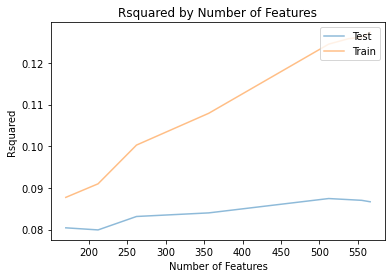

In [11]:
#Model

#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)



Comment: The Rsquared is not as high as we expected to be, nevertheless we mitigate overfitting the model based on excluding the other salary variables that are perfectly correlated with our independent variable. 

# Visualize

Now, for our last step of the analysis, we obtain the coefficients of the best linear model and check the impact of being women in salary. The result is a negative number, then we can conclude that the gender inequility occurs in the tech industry.

In [12]:
#Visualize

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#Result for being a woman on salary
coef_df.loc[coef_df['est_int']=='Gender_Woman']

,est_int,coefs,abs_coefs
150,Gender_Woman,-13611.320485,13611.320485
